<a href="https://colab.research.google.com/github/fay23-dam/tugas_dl/blob/main/tugas_dl/DLTM4/dasaran_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sign-language-mnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3258%2F5337%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T064030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D51fb1c09254f911796542e1c12fdca2d734f2c4122a93b088deb22526798fbff46381f366bbed8344e21ad5c2f41774a3d078fcc3f744f9a46b497fa5fa0bdf674c194fcfe15a68cdd2894c7dd7a97ad126dd77eb1a65207e9fa8905a22c32defa2af7ba25db464145cbd962930c7d264bfc081f7e25f27e4b4f1a4f907d8e9f97c7d6c06e4387ddd7363003c857be35890d22568a188ab06b0440a93d7e944e7ee0cfe5282cd42c7e6daf400485726e86b72133d7c9d9c8feb56ff9232233c06248b35c53171c812a3e4be5033aeba7e58044a14232780b6e3a2bf8d84b385c65dc5b85fb152e940e6c253111c85701bff6e2567533b5c3ba04dc3deb06b286,sign-language-digits-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7836%2F11071%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T064030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7fcc884c5926d769aee1aeca9b0f2c2a07e76d9b3c5fb3acbe90aa8b714d2168102e54e86eb55232e30a12f42e85a596763f473424bc322aecf8fb3d32858826634952648067f355f3f3e54d691509ca0b348b27362f6132132b524b0e2df5862dde159807cd5e89a6699230b1cca21f7d5170cc5e6fc74c2131056b2c5dc46890f92d0bb673de3b0dfba73f2c49ff6a55975ce5955609f71ba2c665247ae7b59fb2d998affc2aa865cb7d9b045a7c7d250fd26bdbdc983cc2750be98bdd9638593d3cdbcf56ec5883c7bca442bf5fe6c8c522ed3ccab9db76c0148127db1873eebe5974cacaf0016c2e335dd4fa316a73254d5f2c8547f9b7d71db063f4803b,asl-alphabet:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F23079%2F29550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T064030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1a535f087e6d581211fffea76716aa3c0b358231d01ba41c69cb5af315a803231298ee6089891fd559cf15535df5ec14e4a4ec68cd1b6ee8474db14ea2fbb19466417bd235c12eee75e0da61f1db73e68ba0ffb04d273dfe9bae90728972be4f08e34ff8a1621a19932a36868a6ee19475c3f8b3c0a7d79cf37fd16c052b2a5dd4e83df6d534d515c183e6bca0a331e5f04546d241936be55f759a59a22d8aec7e3348316f0f50038e7087a80795df38d43fcac9c984a2f2505f29234ac6dd5262072bad76b6b1d89ef67e7721d97a5e591558a0db2f79e926e2b7001643e32238b2ebcc10d90189faec782b38908170f617ba79bc778cda644f8023f8b3da54,asl-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F177084%2F399170%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T064030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D68f554b3f96c7b95ffe5bfef2eaaa10969de7ecdc3af5be907449448cf3784e7fc99c70dafb8aef123403bd1fea4f693be642c6013dd539751c49838bcf58df4f6d89ed6276de97027fe46faf0dfbf2d3ba6c83d9d94ca5e0fb7ef650c422074f6996f1a7e3a4a93ceb47cc7791eda24b7260354e9b0b695888aff9bf23d32f6eb3a596c7491cf7cf4ed4de256917ff71100df9c9f6f763ff2b8de1c2334ffcd41a1ca73df024a0394b1178e40988512900055e378efab2c358ebabd8c0da9d78143ba0912647bedfa281b55cee8ef1fc7a6c8be09aa86874b0c7f594c1fa37d2f6b8bc5849484681ee715ed94ed48c2cda16a0efbcb8f0174e6a328f9f67041,aslamerican-sign-language-aplhabet-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1646010%2F2702383%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T064030Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07849bdb03bf8f0464209dfe570b5ebdfaede503c46cbf393e565227e7bbefcfe4f1bb15213b2b189f730b4859f161061136ce4db0f536f3a8a348ea6c1095d76e475d03acdd95d8e24667cb771f077258725636ef7970dae463398f96e79d032b79a3820dc06476a287973eba0011615c7a3c1321241be86a3a61feadfd6c9cb079645884a033efa31da85bd6eb1160b094fda1ed53f1c48d2d1fdad3bb7908257d73fad1a6dcc82d9c7e743741eb00c283f3a0513aba2864b345b49d1c99a8578a3be52248a4bae249e8e13f419d1660ded8539e25e4a2d14d1a358e2b7496ad15dce0b35425b6c7cb2e0d5c5455c5f97dd1b87f3701f7d7d65fbb42ea9af9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 65633206 bytes downloaded
Downloaded and uncompressed: sign-language-mnist
[==================================================] 17623806 bytes downloaded
Downloaded and uncompressed: sign-language-digits-dataset
[==================================================] 1100887034 bytes downloaded
Downloaded and uncompressed: asl-alphabet
[==================================================] 59642568 bytes downloaded
Downloaded and uncompressed: asl-dataset
[==================================================] 4508201844 bytes downloaded
Downloaded and uncompressed: aslamerican-sign-language-aplhabet-dataset
Data source import complete.


In [2]:
pip install split-folders

In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Path where our data is located
base_path = "/kaggle/input/asl-dataset/asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df

filename  category
0      r/hand3_r_dif_seg_3_cropped.jpeg        27
1      k/hand2_k_dif_seg_2_cropped.jpeg        20
2      0/hand1_0_dif_seg_5_cropped.jpeg         0
3      h/hand3_h_dif_seg_3_cropped.jpeg        17
4      z/hand2_z_top_seg_3_cropped.jpeg        35
...                                 ...       ...
2510   m/hand2_m_dif_seg_2_cropped.jpeg        22
2511   s/hand5_s_dif_seg_1_cropped.jpeg        28
2512  v/hand2_v_left_seg_1_cropped.jpeg        31
2513   4/hand3_4_dif_seg_2_cropped.jpeg         4
2514   u/hand2_u_bot_seg_3_cropped.jpeg        30

[2515 rows x 2 columns]

In [6]:
print("number of elements = ", len(df))

number of elements =  2515


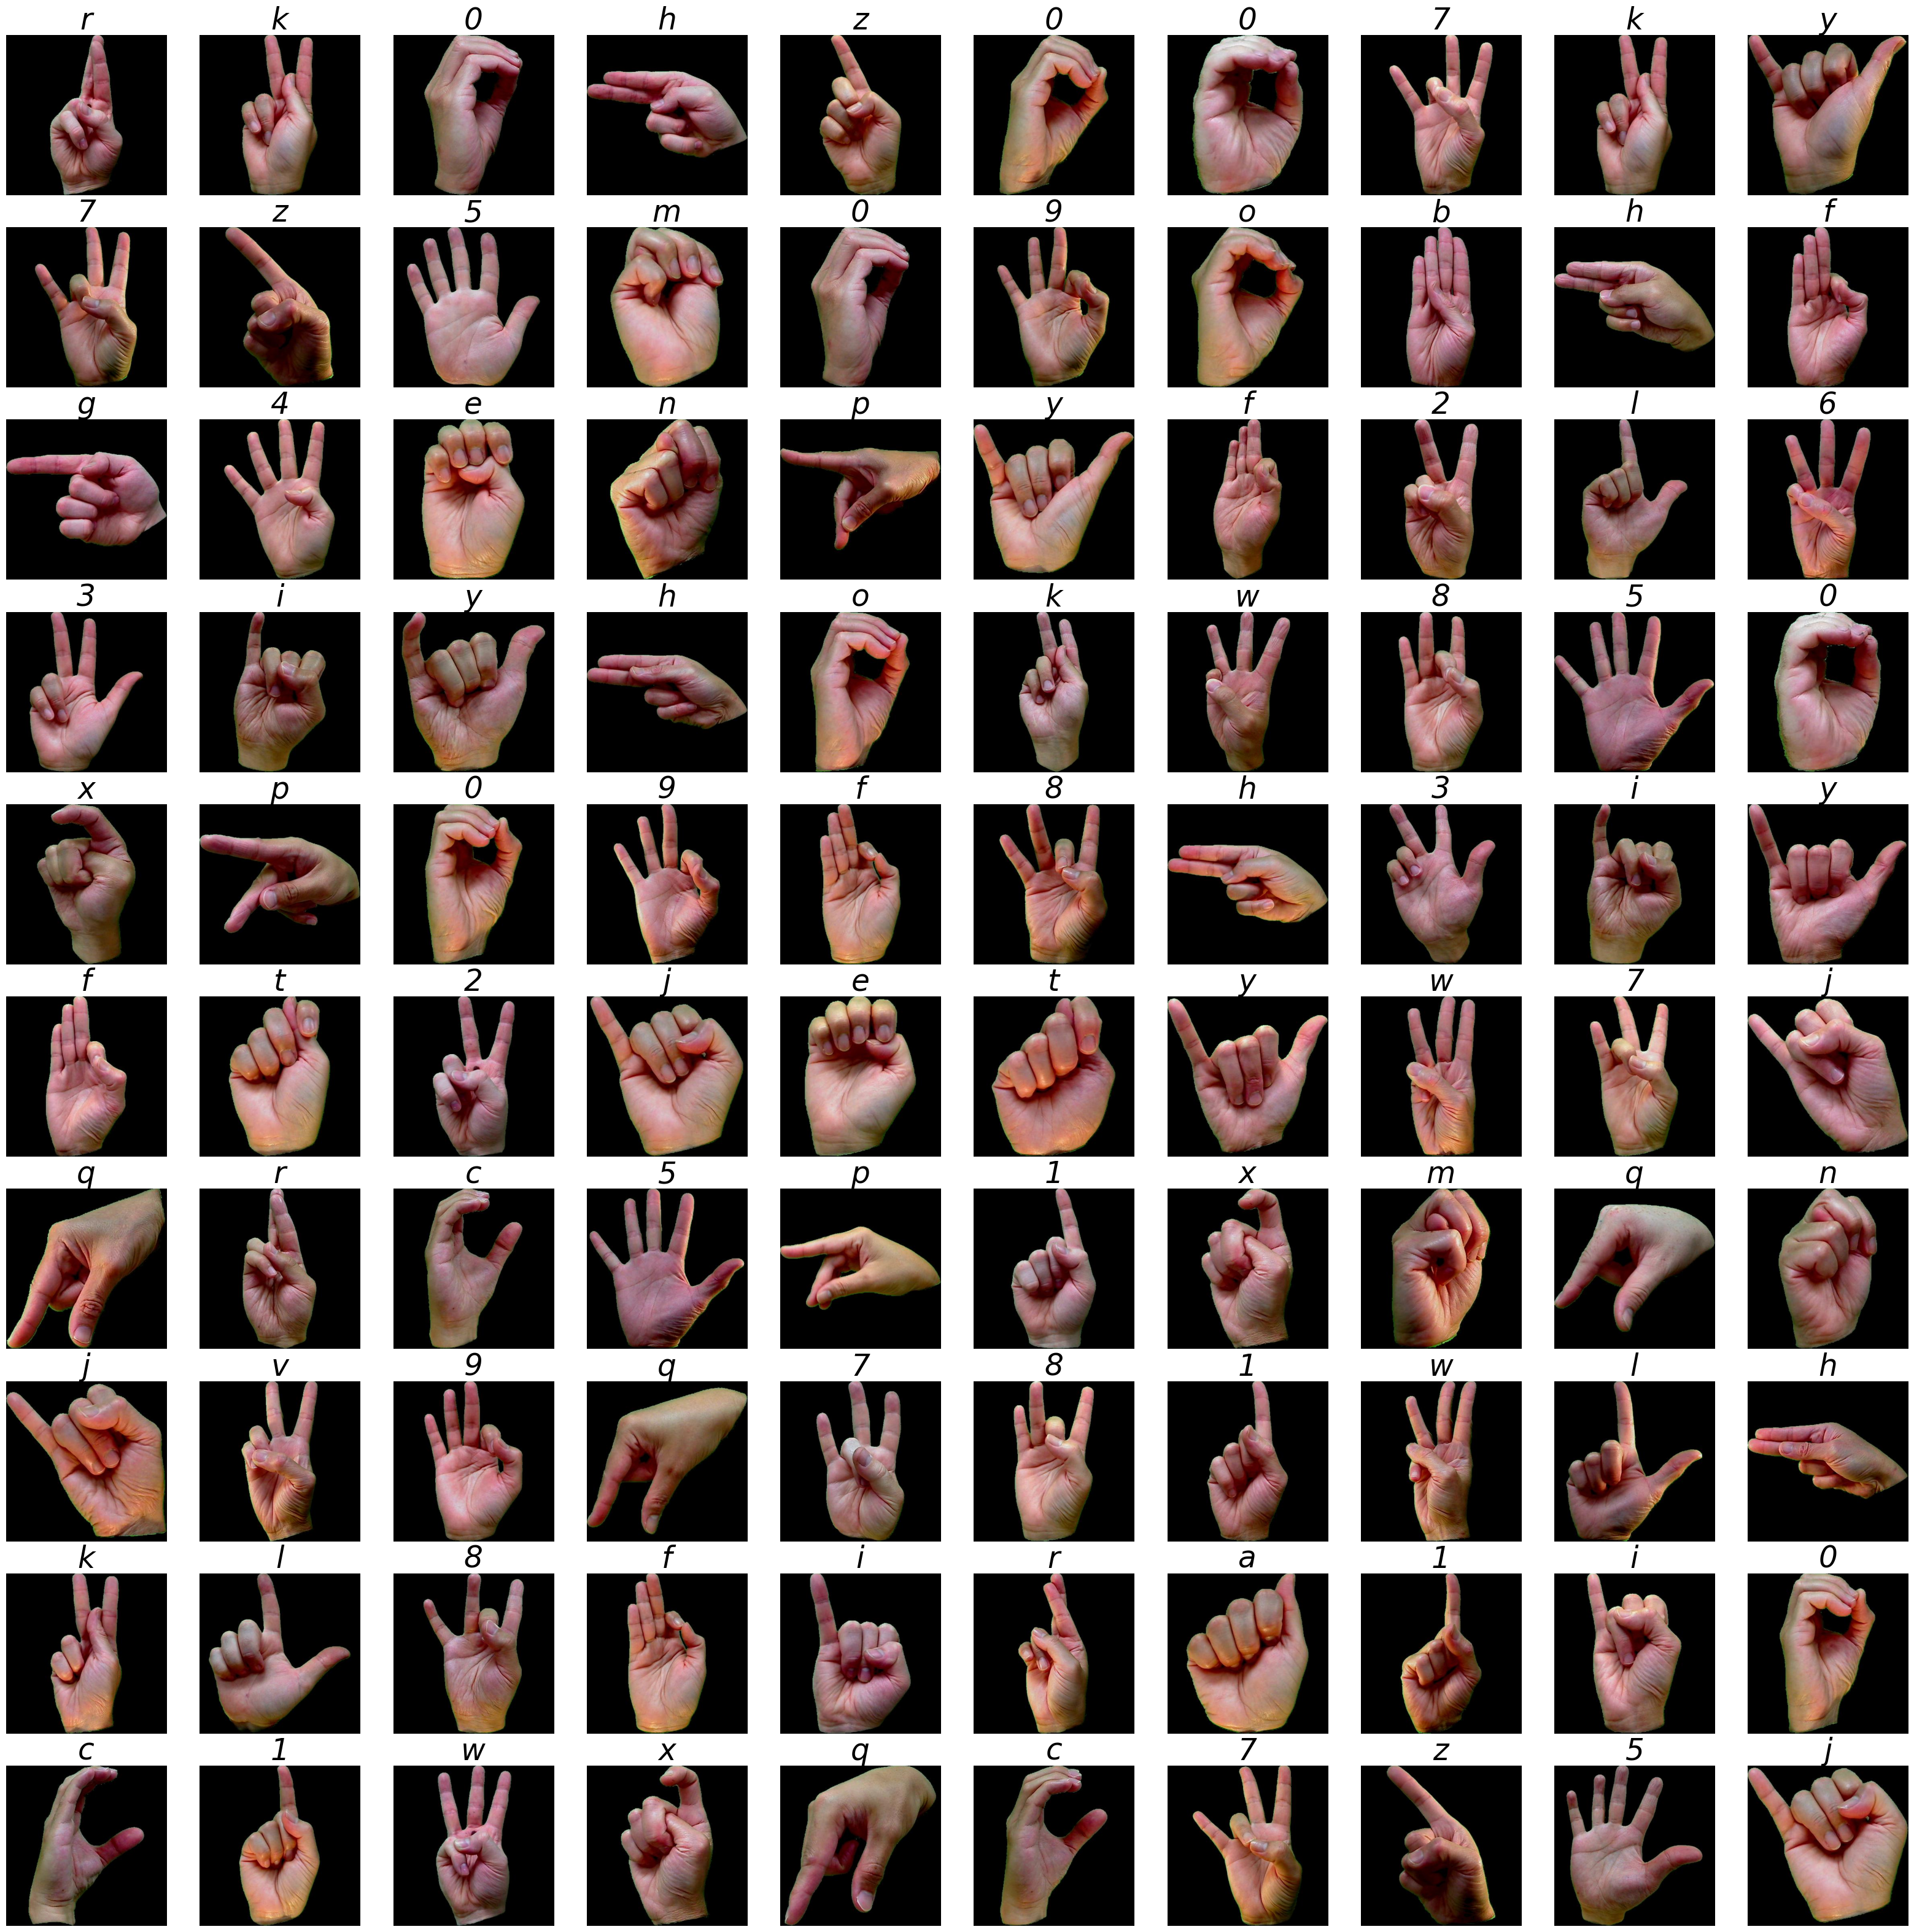

In [7]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = base_path + df.filename[i]
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

<ipython-input-8-34db056625d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)


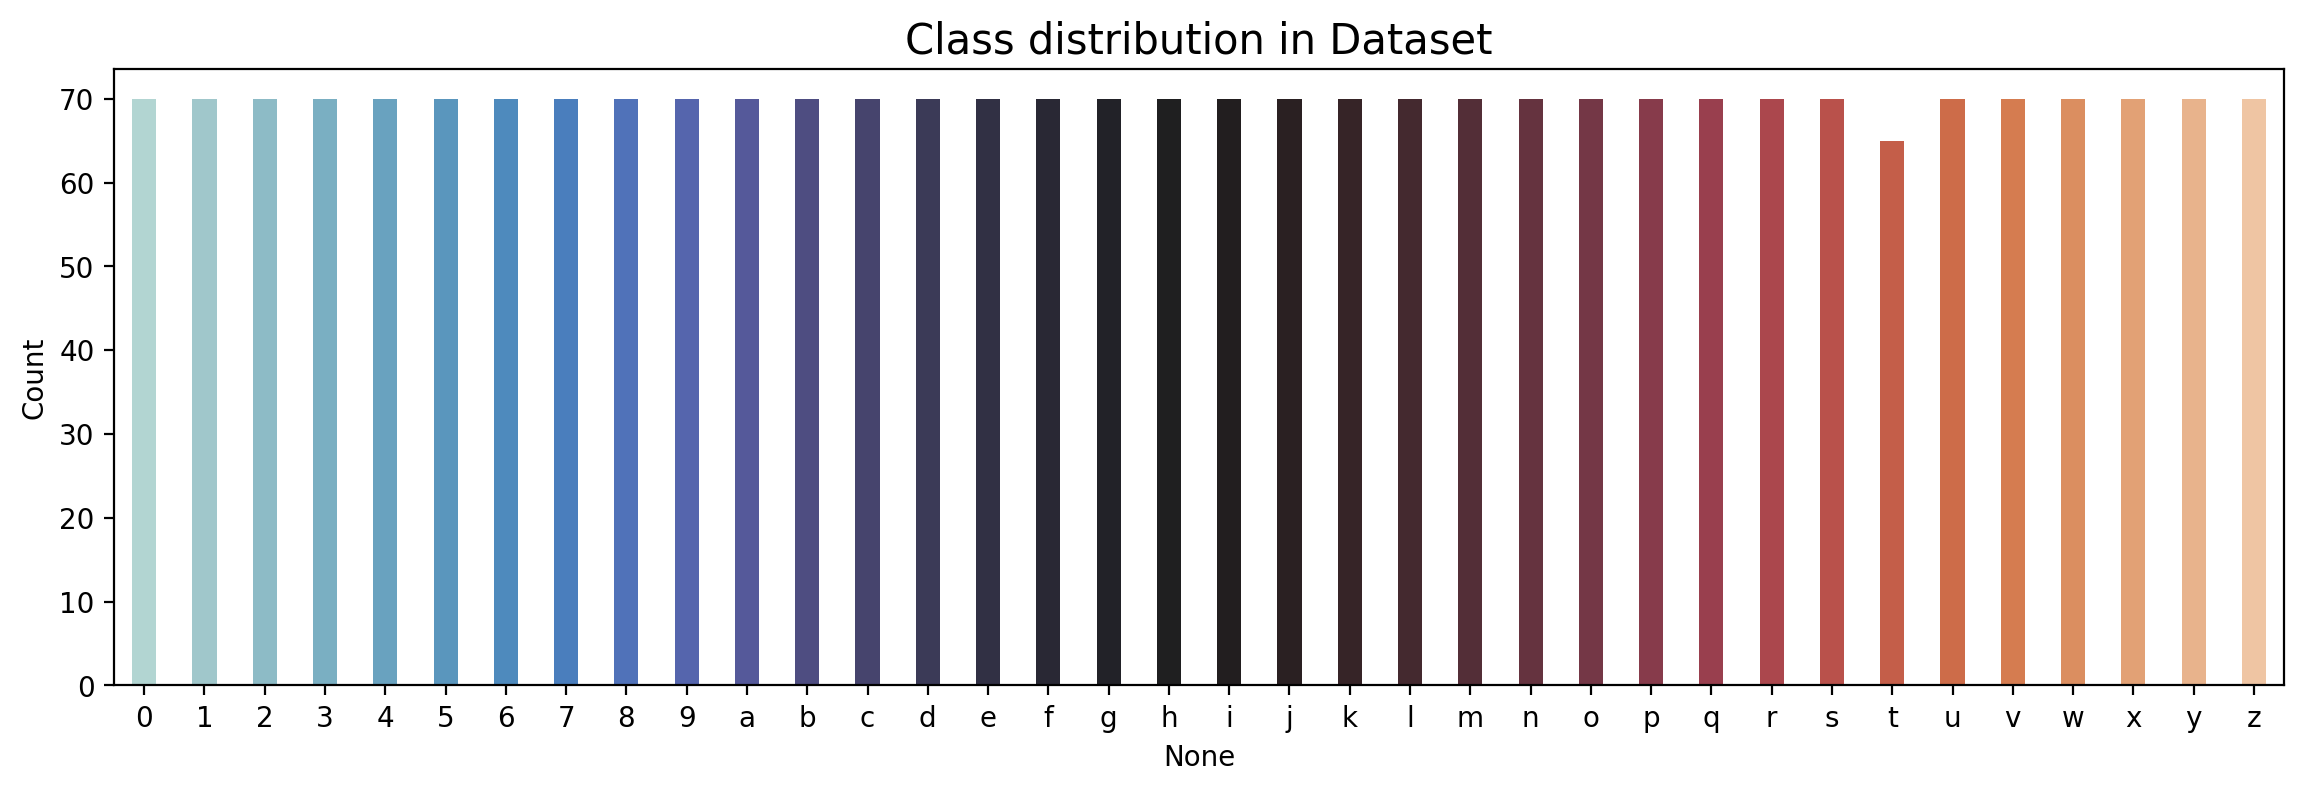

In [8]:
label,count = np.unique(df.category,return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

In [9]:
splitfolders.ratio('/kaggle/input/asl-dataset/asl_dataset',output='/kaggle/working/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 2515 files [00:01, 1349.66 files/s]


In [10]:
import shutil
shutil.rmtree("/kaggle/working/train/asl_dataset")
shutil.rmtree("/kaggle/working/val/asl_dataset")
shutil.rmtree("/kaggle/working/test/asl_dataset")

In [11]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [12]:
train_path = '/kaggle/working/train'
val_path = '/kaggle/working/val'
test_path = '/kaggle/working/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [13]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


In [14]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

#Block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                        

In [15]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [16]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [17]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=30,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 [==============================] - 28s 266ms/step - loss: 2.3706 - accuracy: 0.3623 - val_loss: 0.5153 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 10s 156ms/step - loss: 0.6808 - accuracy: 0.7982 - val_loss: 0.2147 - val_accuracy: 0.9283 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 10s 153ms/step - loss: 0.3022 - accuracy: 0.9051 - val_loss: 0.1454 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 10s 156ms/step - loss: 0.2250 - accuracy: 0.9225 - val_loss: 0.1394 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 10s 150ms/step - loss: 0.1564 - accuracy: 0.9418 - val_loss: 0.1387 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - 10s 154ms/step - loss: 0.1147 - accuracy: 0.9622 - val_loss: 0.1778 - val_accuracy: 0.9641 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - 10s 153ms/st

In [18]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.9502956867218
The Loss of the model for training data is: 0.0031045470386743546
The accuracy of the model for validation data is: 96.81274890899658
The Loss of the model for validation data is: 0.0883530005812645


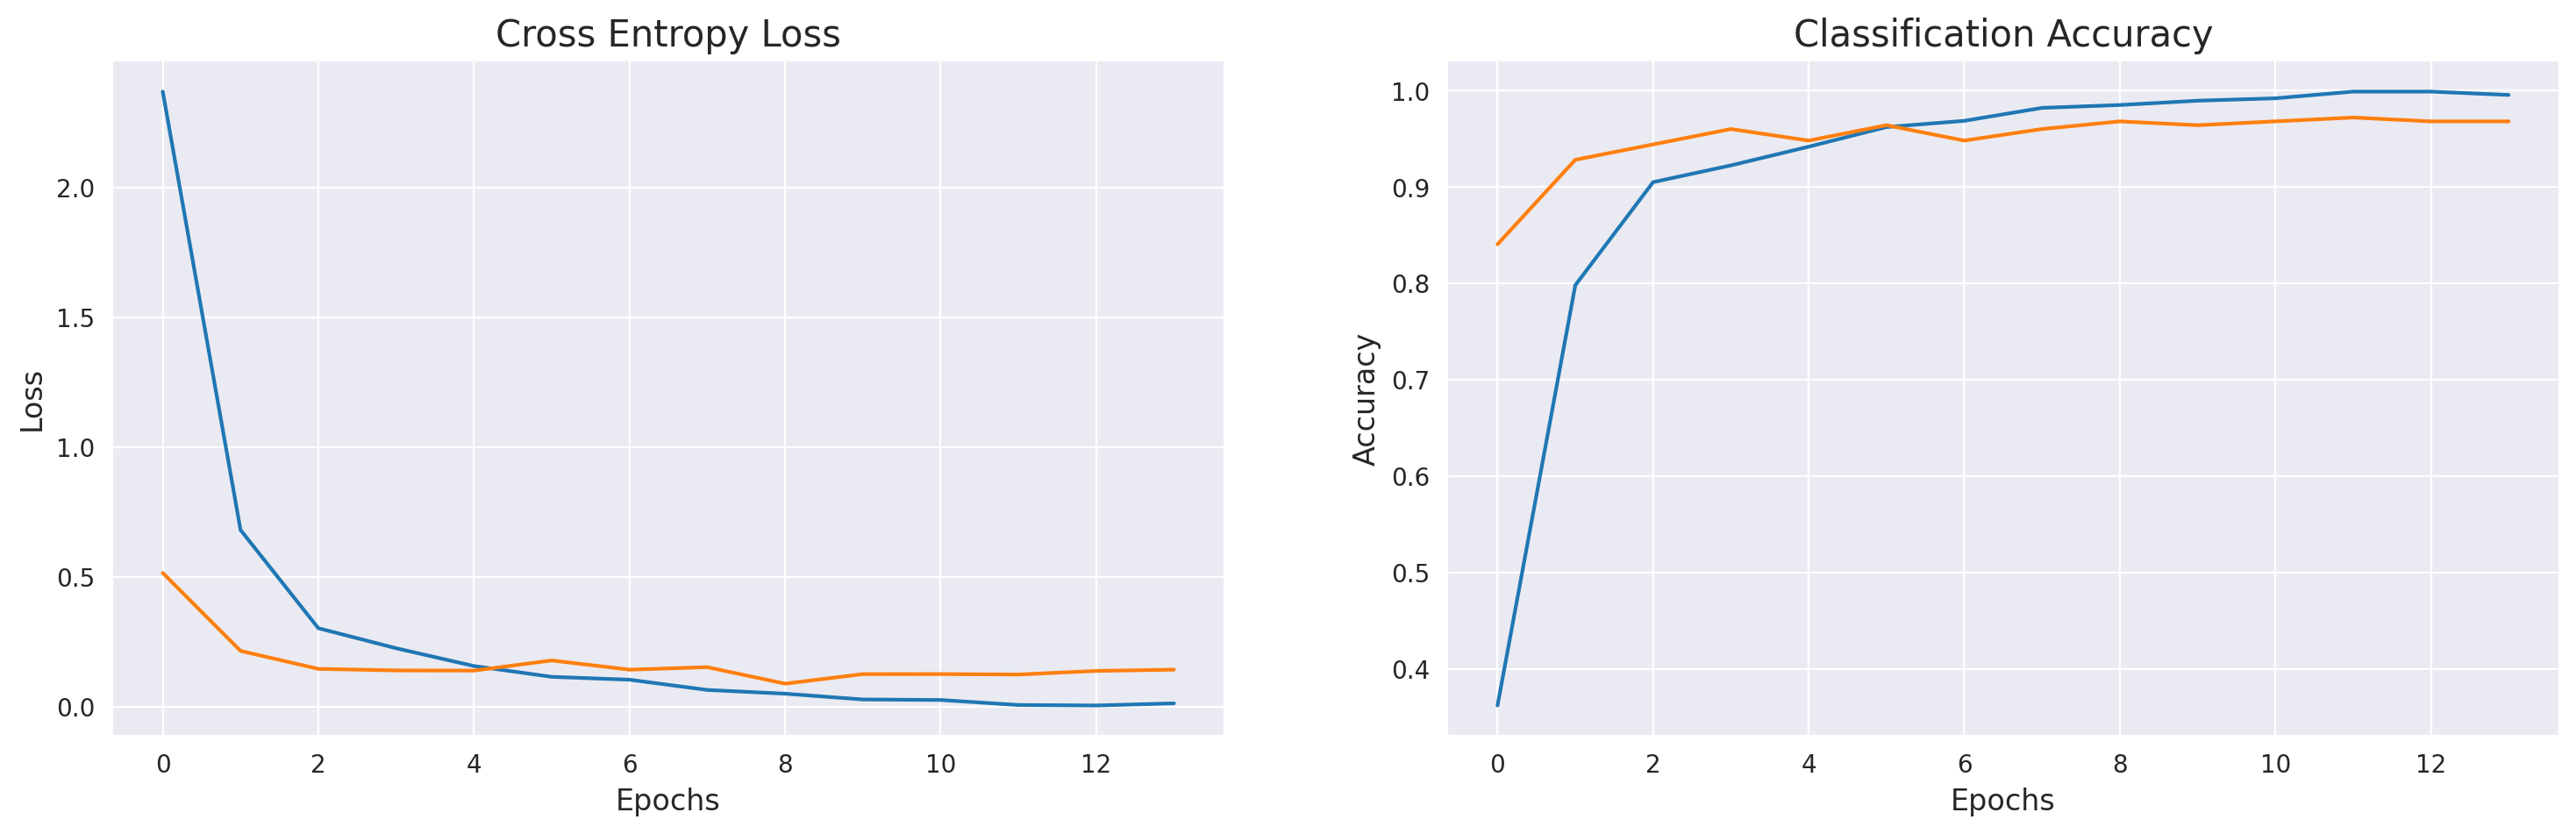

In [19]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [20]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 94.04761791229248
The Loss of the model for testing data is: 0.2602280080318451


In [21]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 237
Incorrect predicted classes: 15


In [22]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.70      1.00      0.82         7
           2       0.75      0.86      0.80         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       0.86      0.86      0.86         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
           a       1.00      1.00      1.00         7
           b       1.00      0.86      0.92         7
           c       1.00      1.00      1.00         7
           d       1.00      1.00      1.00         7
           e       1.00      1.00      1.00         7
           f       1.00      1.00      1.00         7
           g       1.00      0.86      0.92         7
           h       1.00    

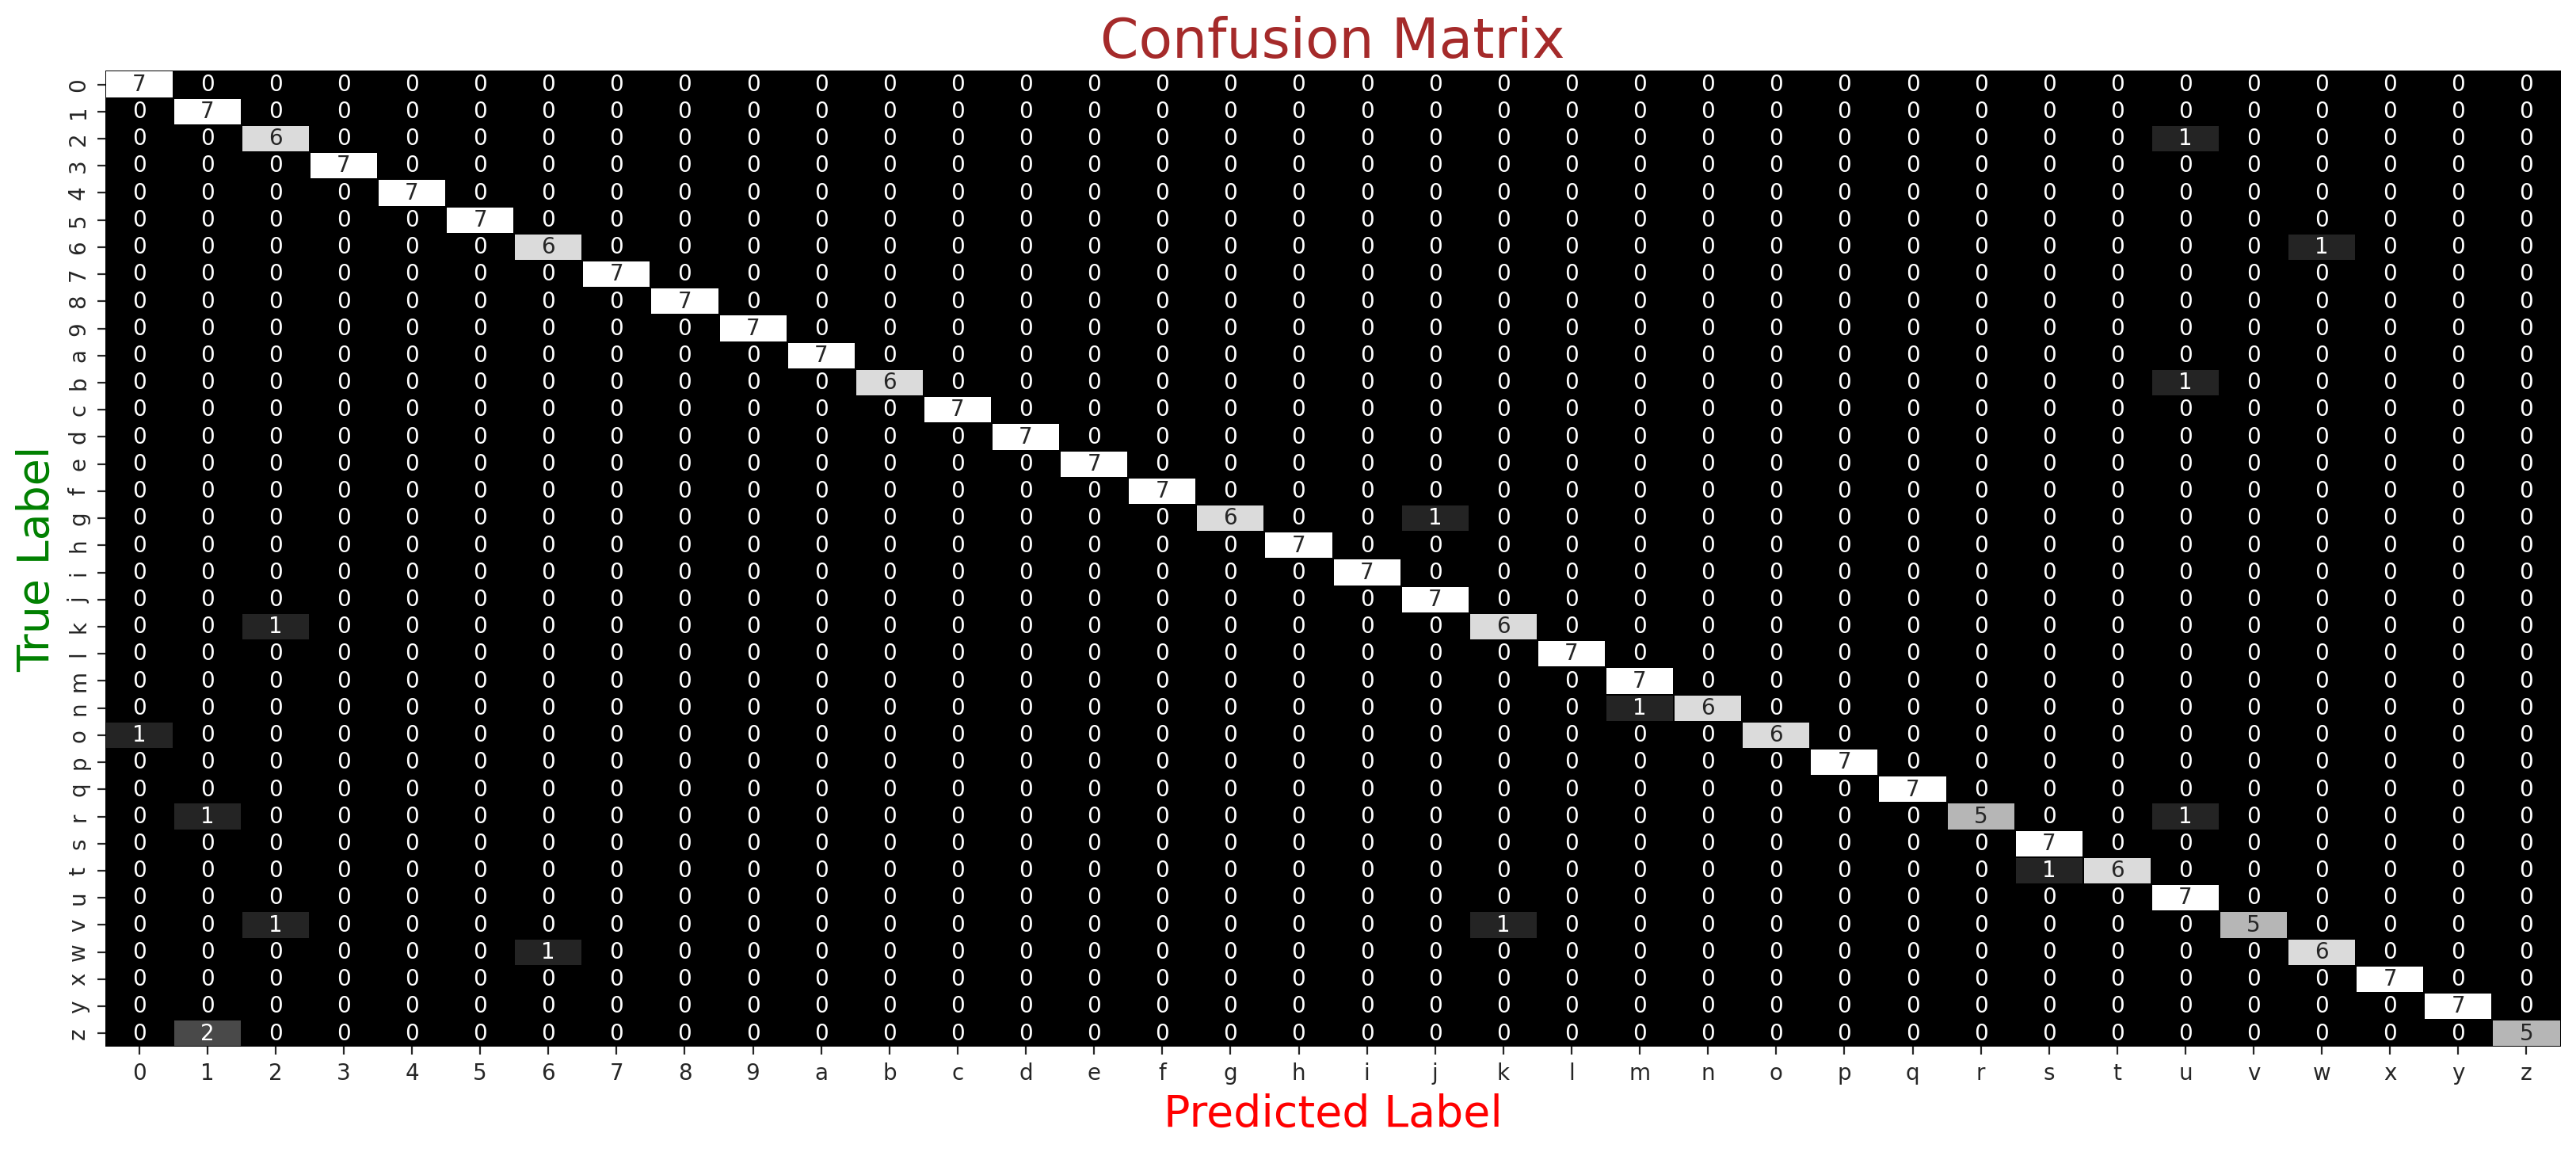

In [23]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "gist_yarg_r",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=categories.values(),
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()